##  Project Outline:
### Data Loading and Exploration.
### Outlier Detection and Removal using either z-score or IQR method.
### Feature Engineering.
### Feature Encoding for categorical features.
### Standardization (or normalization) of numerical features.
### Feature Selection.
### Data Splitting.
### Model Building.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

In [3]:
df=pd.read_csv('C:/Users/Teacher-5B773C/Downloads/datasets/credit_risk_dataset.csv',index_col=False)

In [4]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [5]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
df.shape

(32581, 12)

In [9]:
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
df2=df.dropna()

In [11]:
df2.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32581, dtype: bool

### EDA ###

In [13]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

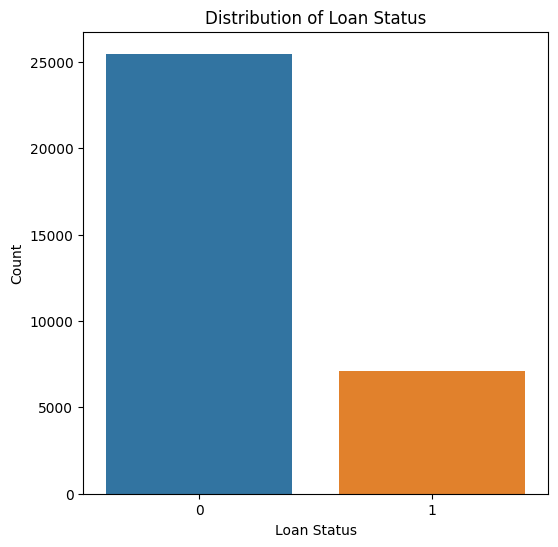

In [14]:
plt.figure(figsize=(6, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='loan_status', ylabel='Density'>

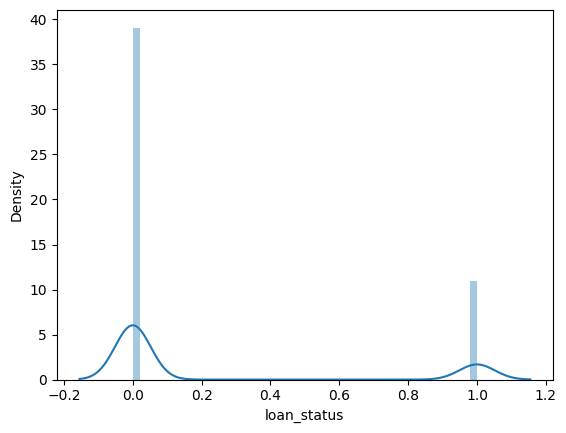

In [15]:
sns.distplot(df['loan_status'])

In [16]:
df3=df.copy()

Text(0, 0.5, 'Frequency of loan_intent')

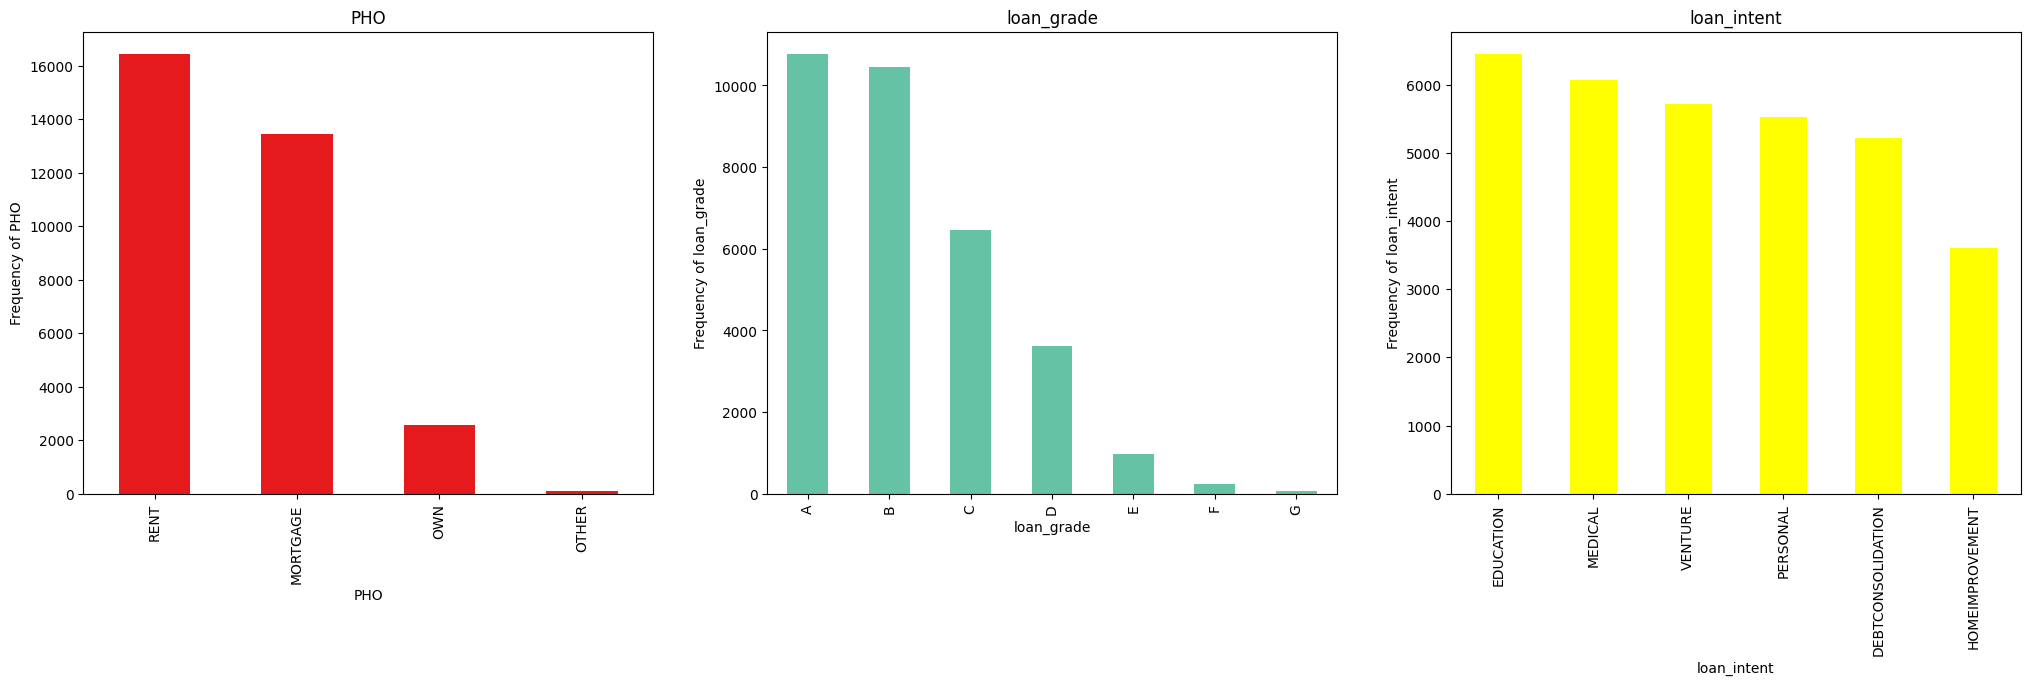

In [17]:
#Let see the relative number of cylynders ,gas type and car body
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
ax=df3['person_home_ownership'].value_counts().plot(kind='bar', stacked=True,colormap='Set1')
plt.title('PHO')
plt.xlabel('PHO')
plt.ylabel('Frequency of PHO')
plt.show

plt.subplot(1,3,2)
ax=df3['loan_grade'].value_counts().plot(kind='bar', stacked=True,colormap='Set2')
plt.title('loan_grade')
plt.xlabel('loan_grade')
plt.ylabel('Frequency of loan_grade')

plt.subplot(1,3,3)
ax=df3['loan_intent'].value_counts().plot(kind='bar', stacked=True,color='yellow')
plt.title('loan_intent')
plt.xlabel('loan_intent')
plt.ylabel('Frequency of loan_intent')

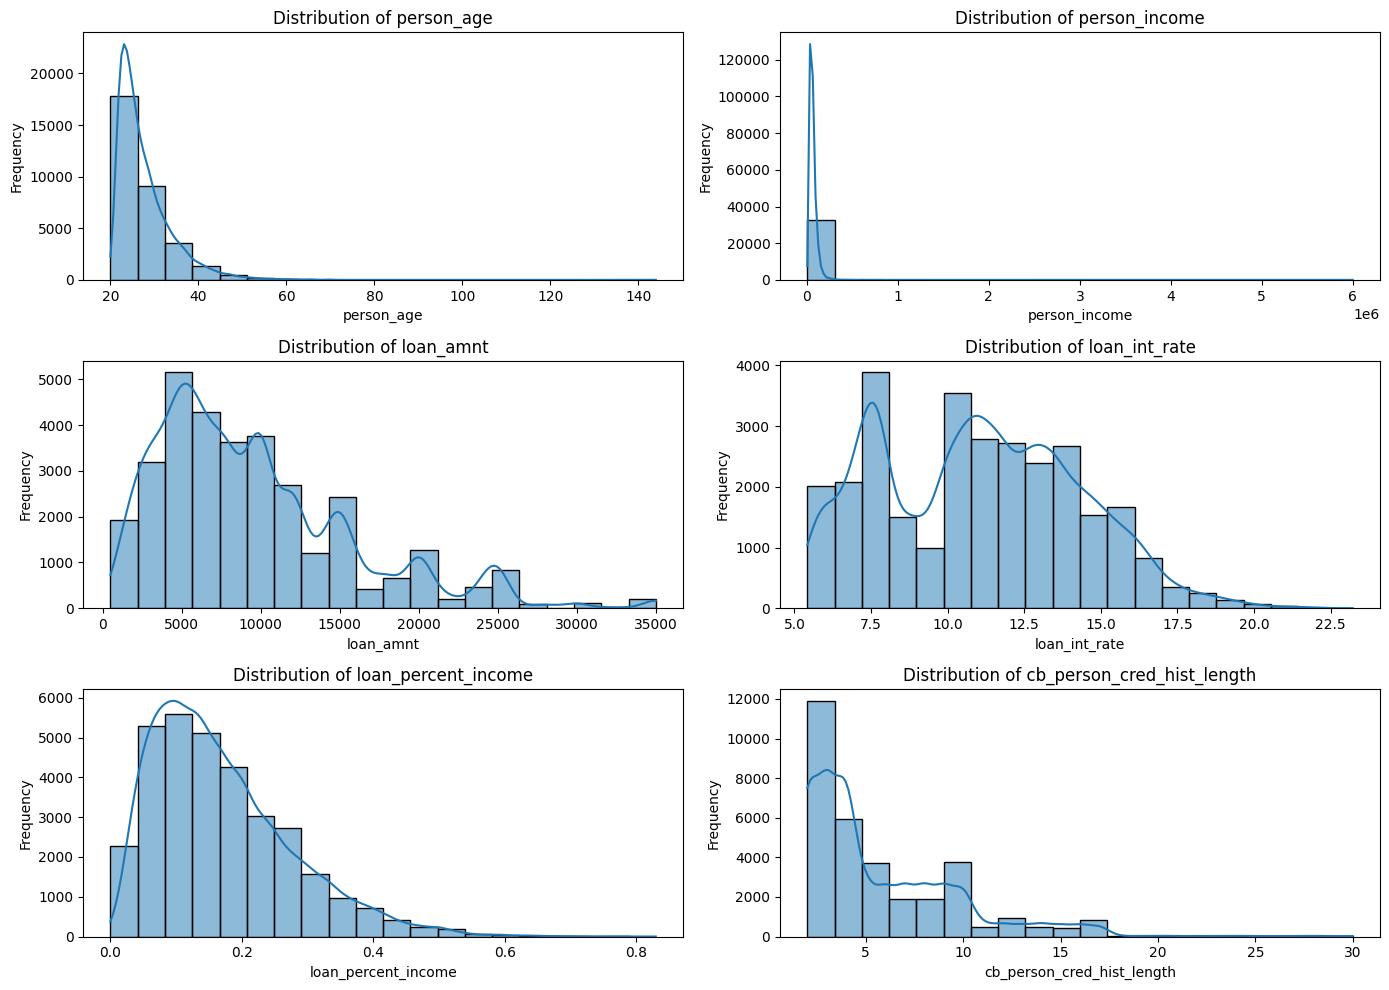

In [18]:
# Select numerical features
numerical_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

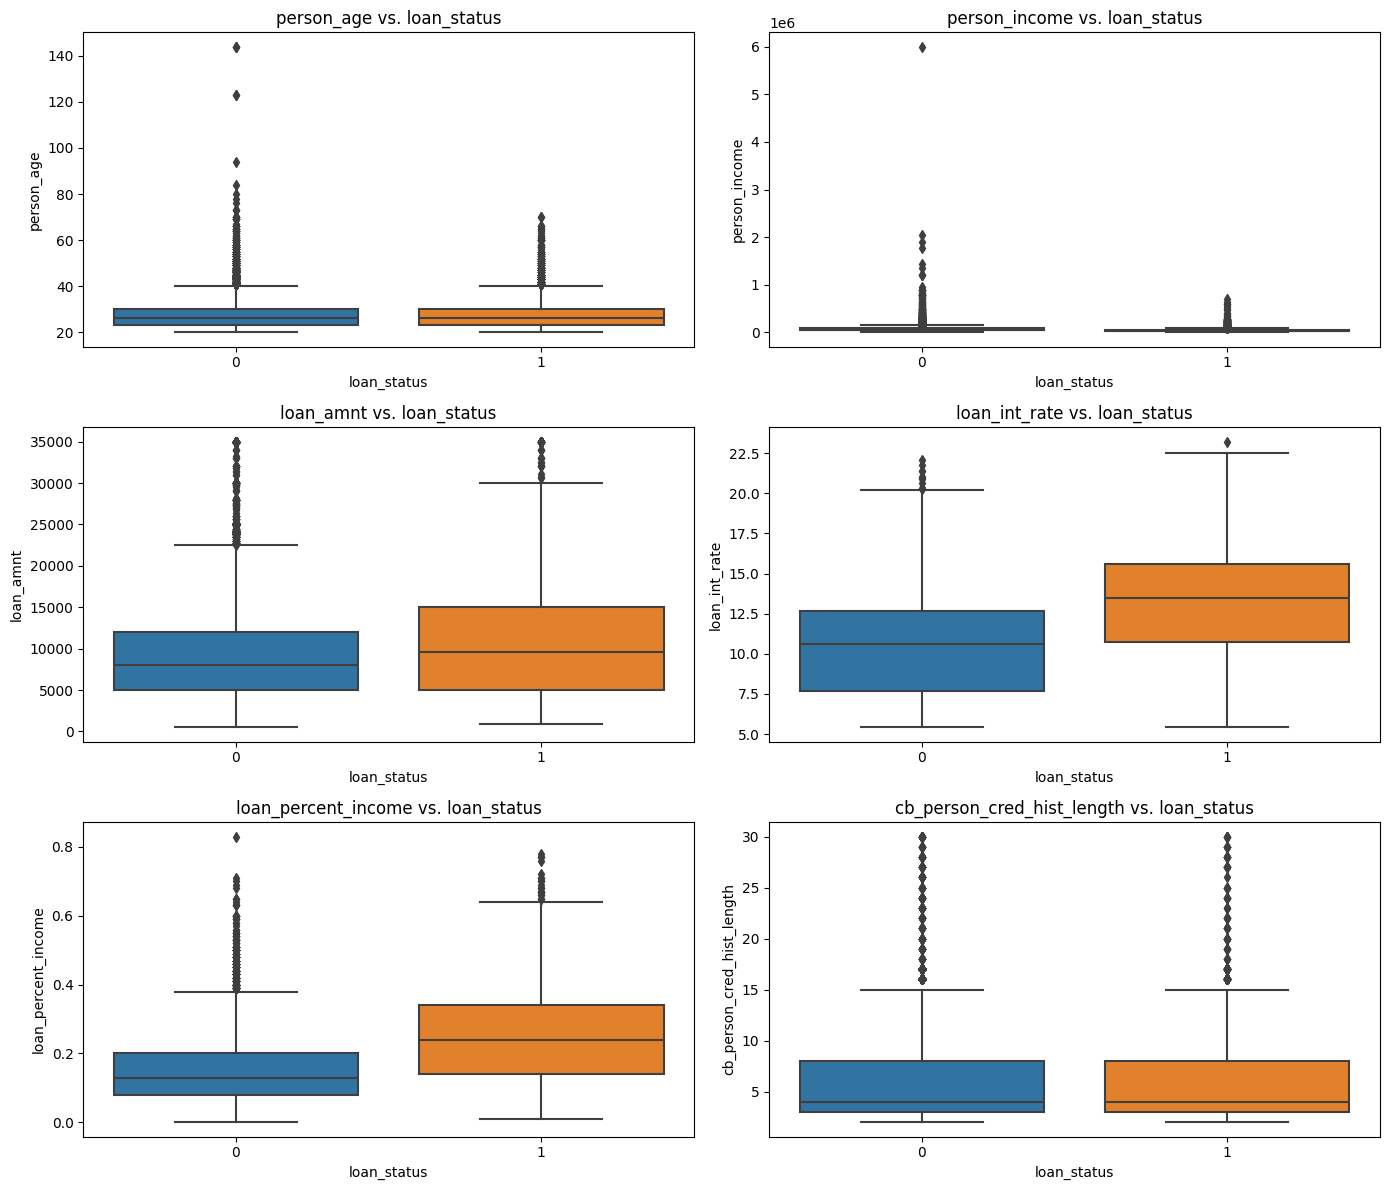

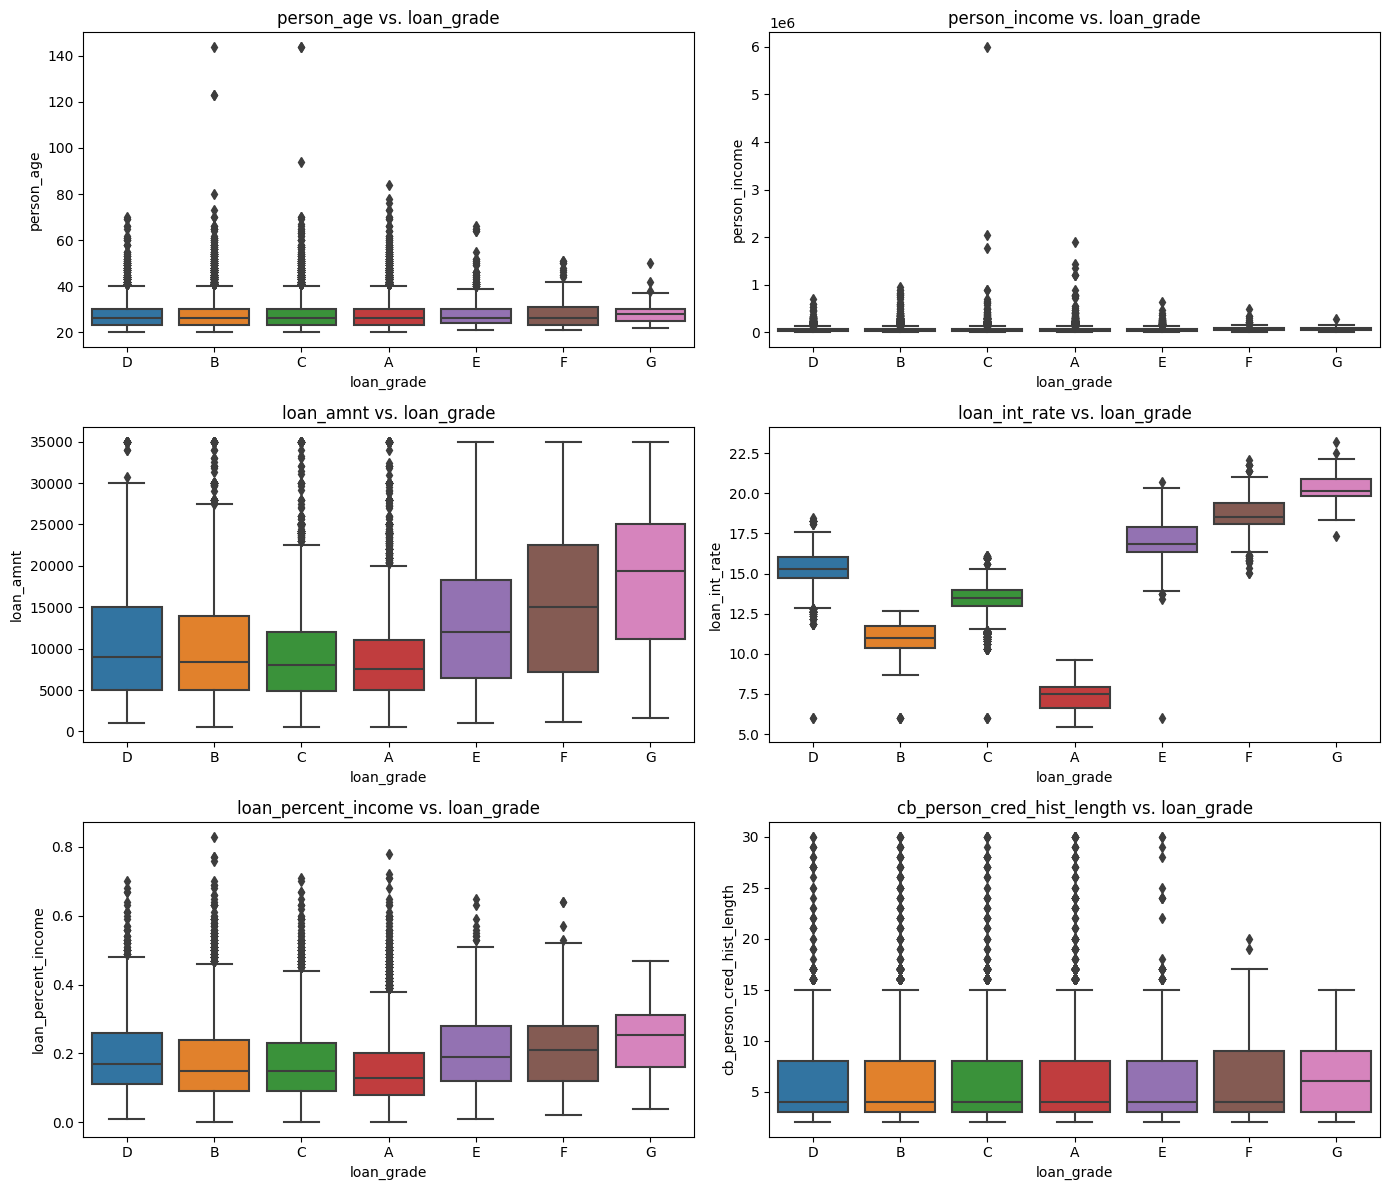

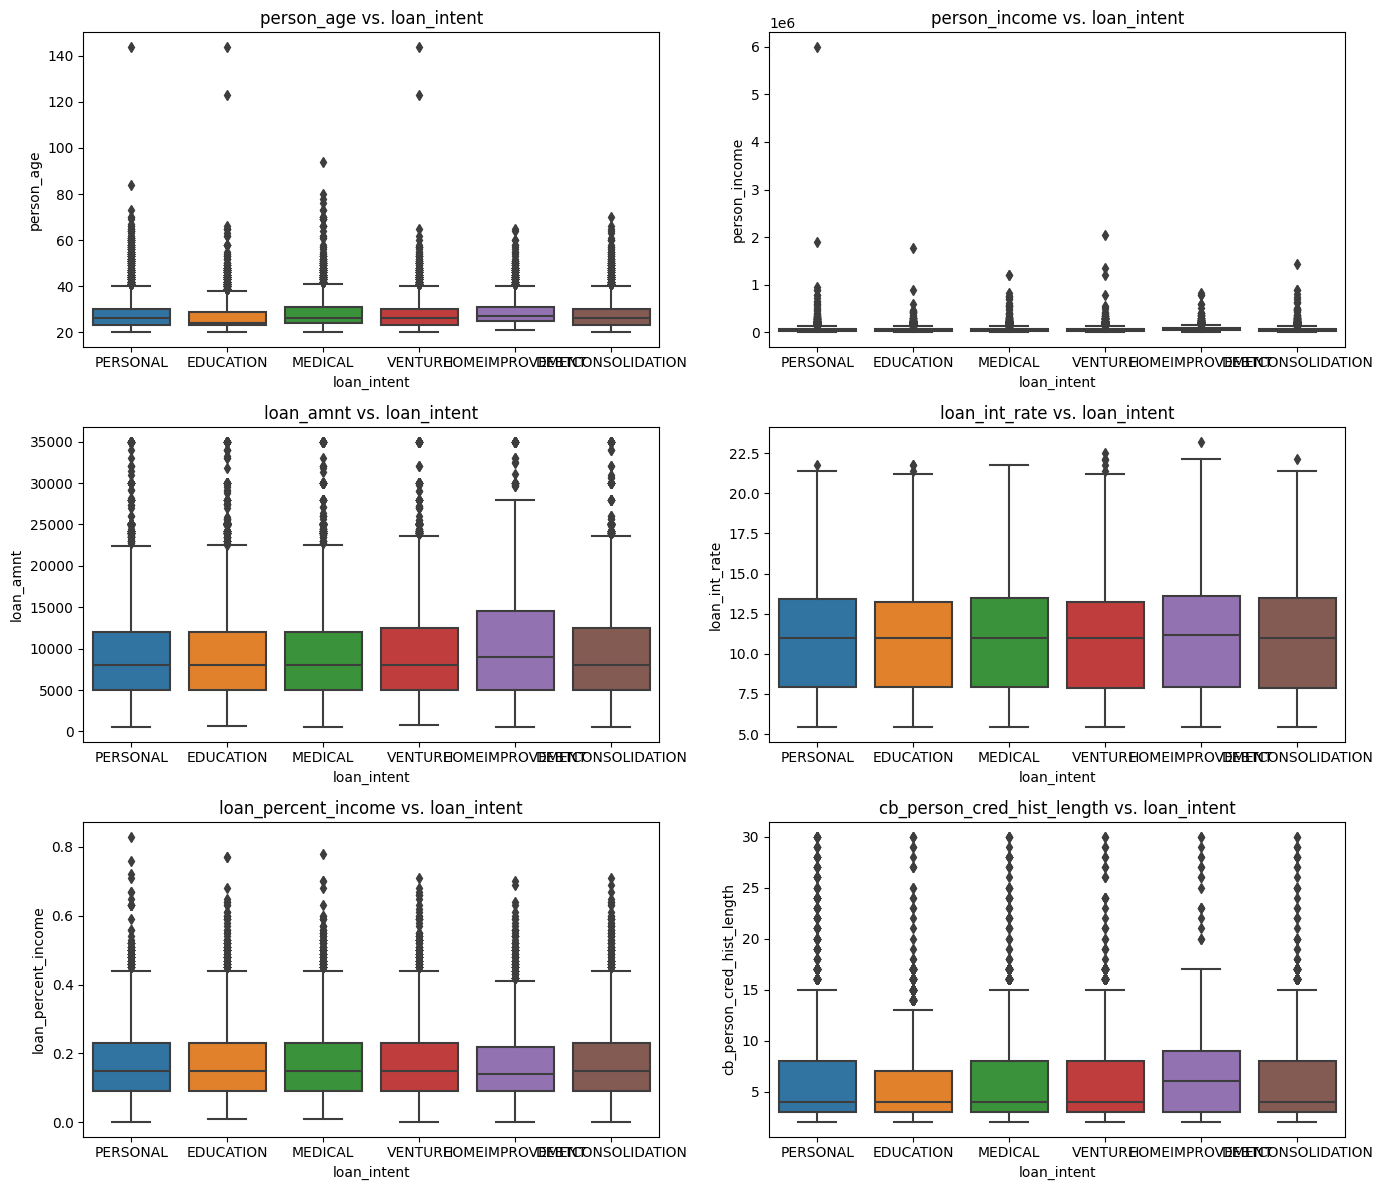

In [19]:

# Select numerical features and categorical features to compare against
numerical_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['loan_status', 'loan_grade', 'loan_intent']

# Plot box plots for each numerical feature against each categorical feature
for cat_feature in categorical_features:
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
    axes = axes.flatten()
    for i, num_feature in enumerate(numerical_features):
        sns.boxplot(x=cat_feature, y=num_feature, data=df, ax=axes[i])
        axes[i].set_title(f'{num_feature} vs. {cat_feature}')
        axes[i].set_xlabel(cat_feature)
        axes[i].set_ylabel(num_feature)
    plt.tight_layout()
    plt.show()


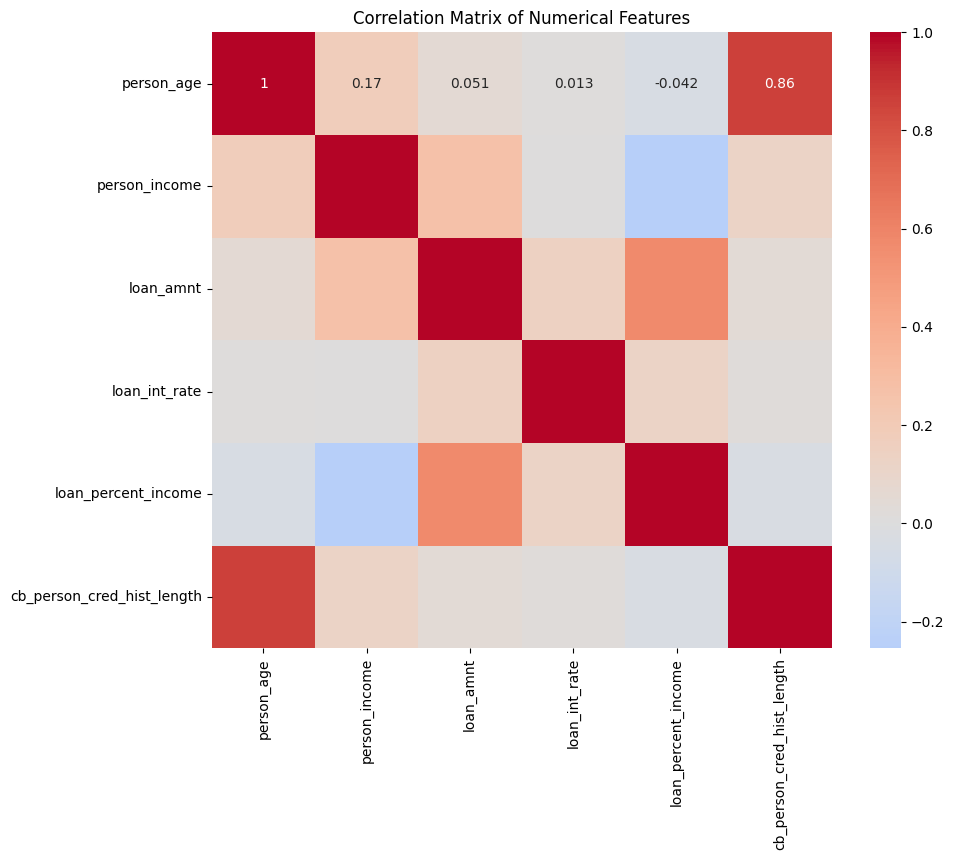

Highly correlated pairs (absolute value > 0.7):
cb_person_cred_hist_length and person_age: 0.86


In [20]:
# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# Identify highly correlated pairs
threshold = 0.7
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((colname1, colname2, corr_value))

# Print highly correlated pairs
print("Highly correlated pairs (absolute value > 0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

### Cleaning Process ###

In [21]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [22]:
for col in numerical_features:
    df[col].fillna(df[col].median(), inplace=True)
    
# Example: Fill missing values with the mode for categorical columns
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [23]:
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [24]:

# Replace non-standard missing values with NaN
df['person_emp_length'].replace('NA', np.nan, inplace=True)
df['loan_int_rate'].replace('NA', np.nan, inplace=True)
# Repeat for other non-standard representations if found


In [25]:
# Check for missing values again
print(df['person_emp_length'].isnull().sum())
print(df['loan_int_rate'].isnull().sum())

895
0


In [26]:
# Handle missing values
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [27]:
# Re-check for missing values
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


## OUTLIER DETECTION AND REMOVAL ##

In [28]:
numerical_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# 1. Calculate IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# 2. Identify and Remove Outliers
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)
cleaned_df = df[~outliers]

# Check the shape after removing outliers
print("Data shape after removing outliers:", cleaned_df.shape)

Data shape after removing outliers: (27507, 12)


In [29]:
cleaned_df.head()

person_age  person_income person_home_ownership  person_emp_length  \
1           21           9600                   OWN                5.0   
5           21           9900                   OWN                2.0   
9           21          10000                   OWN                6.0   
19          24          10800              MORTGAGE                8.0   
23          24          10980                   OWN                0.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1    EDUCATION          B       1000          11.14            0   
5      VENTURE          A       2500           7.14            1   
9      VENTURE          D       1600          14.74            1   
19   EDUCATION          B       1750          10.99            1   
23    PERSONAL          A       1500           7.29            0   

    loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
1                  0.10                         N                           2  
5                  0.25                         N                           2  
9                  0.16                         N                           3  
19                 0.16                         N                           2  
23                 0.14                         N                           3

### Feature Scaling numerical values ###

In [30]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Apply StandardScaler
scaler = StandardScaler()
cleaned_df[numerical_features]=scaler.fit_transform(cleaned_df[numerical_features])
cleaned_df[numerical_features].head()

person_age  person_income  loan_amnt  loan_int_rate  loan_percent_income  \
1    -1.280599      -1.799501  -1.526506       0.079396            -0.669270   
5    -1.280599      -1.788294  -1.218361      -1.242528             0.941332   
9    -1.280599      -1.784558  -1.403248       1.269127            -0.025029   
19   -0.585200      -1.754671  -1.372433       0.029824            -0.025029   
23   -0.585200      -1.747947  -1.423791      -1.192956            -0.239776   

    cb_person_cred_hist_length  
1                    -1.019831  
5                    -1.019831  
9                    -0.688331  
19                   -1.019831  
23                   -0.688331

## Transforming categorical data and feature scaling ##

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
# Identify numerical and categorical features
numerical_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Define the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X = preprocessor.fit_transform(cleaned_df)

# Convert to DataFrame
X_df = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())


In [33]:
X_df.head()

num__person_age  num__person_income  num__loan_amnt  num__loan_int_rate  \
0        -1.280599           -1.799501       -1.526506            0.079396   
1        -1.280599           -1.788294       -1.218361           -1.242528   
2        -1.280599           -1.784558       -1.403248            1.269127   
3        -0.585200           -1.754671       -1.372433            0.029824   
4        -0.585200           -1.747947       -1.423791           -1.192956   

   num__loan_percent_income  num__cb_person_cred_hist_length  \
0                 -0.669270                        -1.019831   
1                  0.941332                        -1.019831   
2                 -0.025029                        -0.688331   
3                 -0.025029                        -1.019831   
4                 -0.239776                        -0.688331   

   cat__person_home_ownership_MORTGAGE  cat__person_home_ownership_OTHER  \
0                                  0.0                               0.0   
1                                  0.0                               0.0   
2                                  0.0                               0.0   
3                                  1.0                               0.0   
4                                  0.0                               0.0   

   cat__person_home_ownership_OWN  cat__person_home_ownership_RENT  ...  \
0                             1.0                              0.0  ...   
1                             1.0                              0.0  ...   
2                             1.0                              0.0  ...   
3                             0.0                              0.0  ...   
4                             1.0                              0.0  ...   

   cat__loan_grade_B  cat__loan_grade_C  cat__loan_grade_D  cat__loan_grade_E  \
0                1.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                1.0                0.0   
3                1.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   cat__loan_grade_F  cat__loan_grade_G  cat__cb_person_default_on_file_N  \
0                0.0                0.0                               1.0   
1                0.0                0.0                               1.0   
2                0.0                0.0                               1.0   
3                0.0                0.0                               1.0   
4                0.0                0.0                               1.0   

   cat__cb_person_default_on_file_Y  remainder__person_emp_length  \
0                               0.0                           5.0   
1                               0.0                           2.0   
2                               0.0                           6.0   
3                               0.0                           8.0   
4                               0.0                           0.0   

   remainder__loan_status  
0                     0.0  
1                     1.0  
2                     1.0  
3                     1.0  
4                     0.0  

[5 rows x 27 columns]

### Defining the target variable ###

In [34]:
# Define the target variable
y = cleaned_df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (22005, 27) (22005,)
Testing set shape: (5502, 27) (5502,)


## TRAINING AND EVALUATION ##

#### Importing necessary libraries ####

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

# Ignore warnings for clean output
warnings.filterwarnings('ignore')


In [36]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    return accuracy, precision, recall, f1, roc_auc

# Dictionary to store model performance
model_performance = {}

# Evaluate each model
for model_name, model in models.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_train, y_train, X_test, y_test)
    model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Convert performance dictionary to DataFrame for better visualization
performance_df = pd.DataFrame(model_performance).T
print(performance_df)


                        Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression     1.000000   1.000000  1.000000  1.000000  1.000000
Decision Tree           1.000000   1.000000  1.000000  1.000000  1.000000
Random Forest           1.000000   1.000000  1.000000  1.000000  1.000000
Support Vector Machine  1.000000   1.000000  1.000000  1.000000  1.000000
K-Nearest Neighbors     0.947837   0.988413  0.754867  0.855996  0.968884


In [37]:
performance_df

Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression     1.000000   1.000000  1.000000  1.000000  1.000000
Decision Tree           1.000000   1.000000  1.000000  1.000000  1.000000
Random Forest           1.000000   1.000000  1.000000  1.000000  1.000000
Support Vector Machine  1.000000   1.000000  1.000000  1.000000  1.000000
K-Nearest Neighbors     0.947837   0.988413  0.754867  0.855996  0.968884

### Checking for class distributions ###

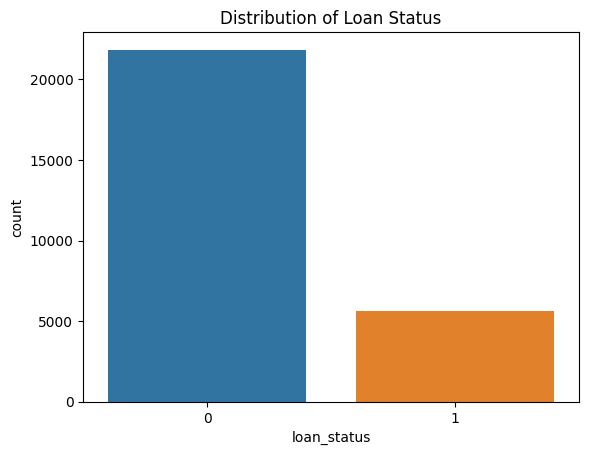

0    0.794598
1    0.205402
Name: loan_status, dtype: float64


In [38]:

# Check class distribution
sns.countplot(x='loan_status', data=cleaned_df)
plt.title('Distribution of Loan Status')
plt.show()

# Print class distribution
print(cleaned_df['loan_status'].value_counts(normalize=True))


## Addressing the class Imbalance we use smote and cross validation ##

In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE